## Q1.11 ##

In [38]:
%%file generate_square_wave.m
function [ time_pos , sq_wave , B_unnorm ] = generate_square_wave
    n_comps = 30; period = 10; fundFreq = 1/ period ;
    time_pos = 0:0.0001:2* period ; harmonics = 2*(1: n_comps ) -1;
    sq_wave = floor (0.9* sin (2* pi * fundFreq * time_pos ) ) +.5;
    B_unnorm = sin (2* pi * fundFreq *( harmonics' * time_pos ) ) /2; % % generate the basis
end


Created file '/nfs/ug/homes-5/l/litian17/jupyter/ECE367/A1/generate_square_wave.m'.


### a) ###

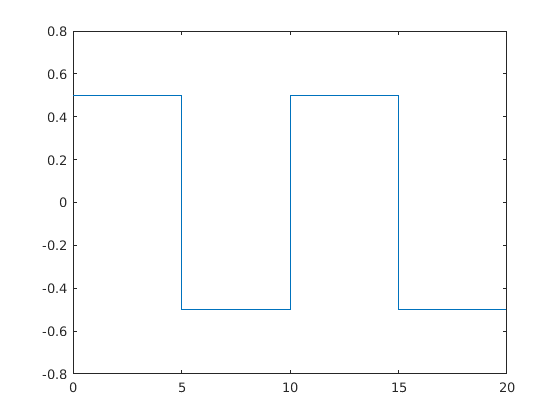

In [4]:
[time_pos, sq_wave, B_unnorm] = generate_square_wave();
plot(time_pos, sq_wave)
axis([0 20 -0.8 0.8])

### b) ###

However, since they are discretized, we can simply take the dot product of their vectors.

The basis vectors represent continuous functions of time, which have their inner product defined as the integration of their product over all time.

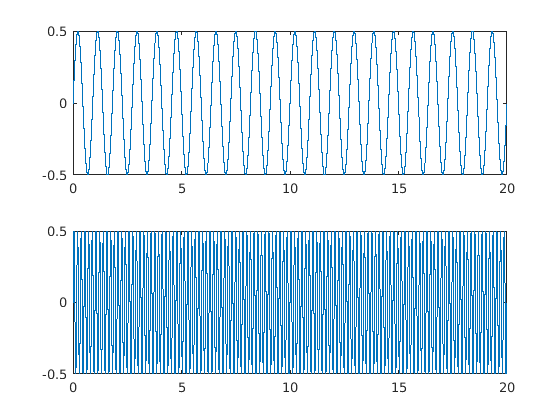

In [20]:
subplot(2, 1, 1)
title('6th component of B_unnorm')
plot(time_pos, B_unnorm(6, :))

subplot(2, 1, 2)
title('30th component of B_unnorm')
plot(time_pos, B_unnorm(30, :))

### c) ###

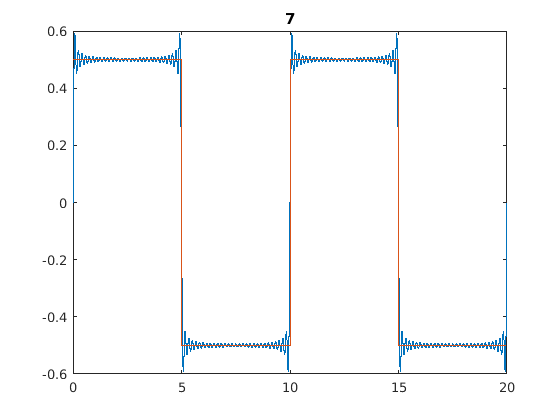

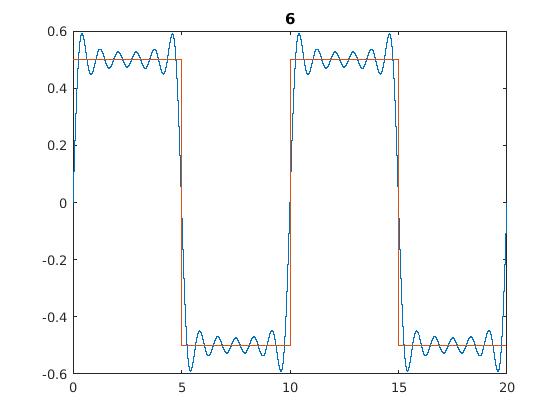

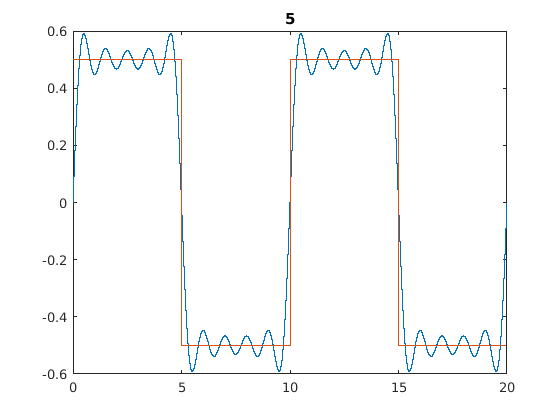

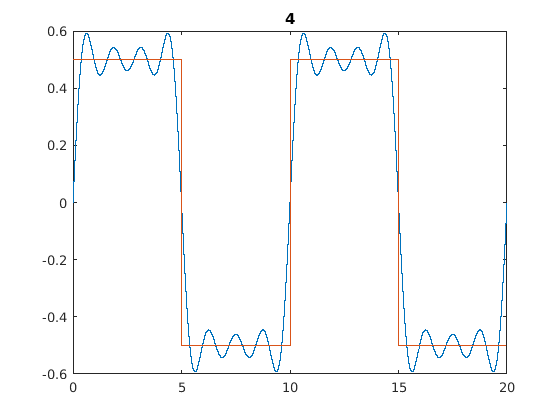

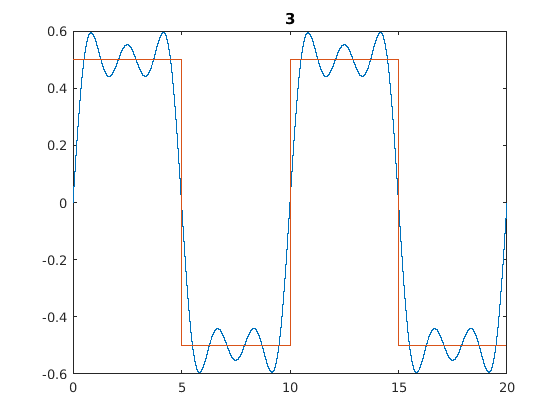

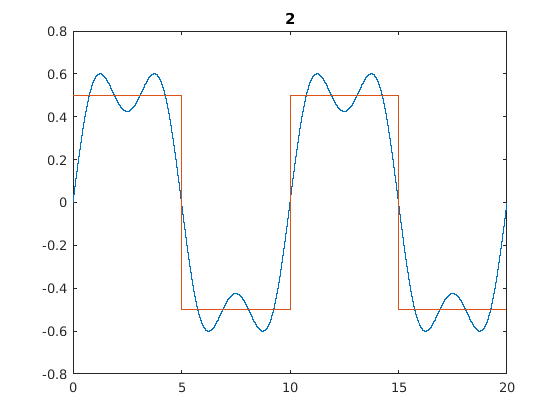

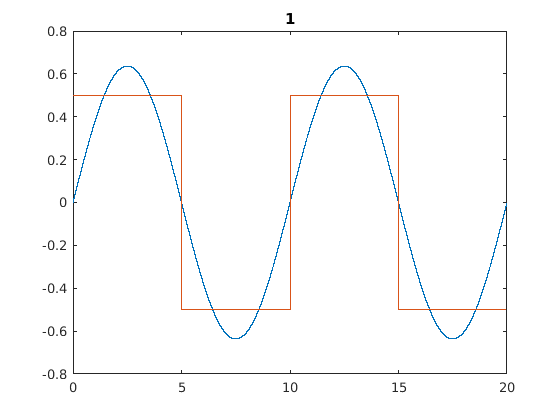

In [98]:
%plot inline -h 1000

% Normalize the basis vectors.
B_unnorm_norms = sqrt(sum(B_unnorm .* B_unnorm, 2));
B_norm = B_unnorm;
B_norm = bsxfun(@rdivide, B_unnorm, B_unnorm_norms);

% Project square wave onto this basis.
num_vecs = size(B_norm, 1);
coeffs = zeros(num_vecs, 1);
for i = 1:num_vecs
    coeffs(i) = sum(B_norm(i, :) .* sq_wave, 2);
end

% Create plots.
proj_idx_range = [1 2 3 4 5 6 30]';
num_plots = size(proj_idx_range, 1);
for i = 1:num_plots
    approx = zeros(size(sq_wave));
    for j = 1:proj_idx_range(i, 1)
        approx = approx + coeffs(j) .* B_norm(j, :);
    end
    figure(i)
    plot(time_pos, approx, time_pos, sq_wave)
    title(i)
end

